In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate



import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv("bank.csv", sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<Axes: xlabel='y', ylabel='count'>

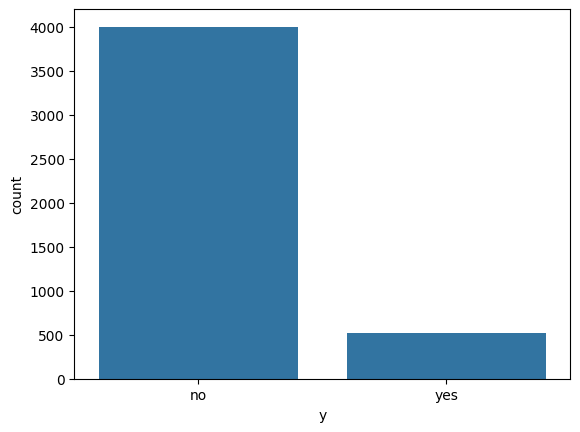

In [5]:
sns.countplot(x="y", data=df)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


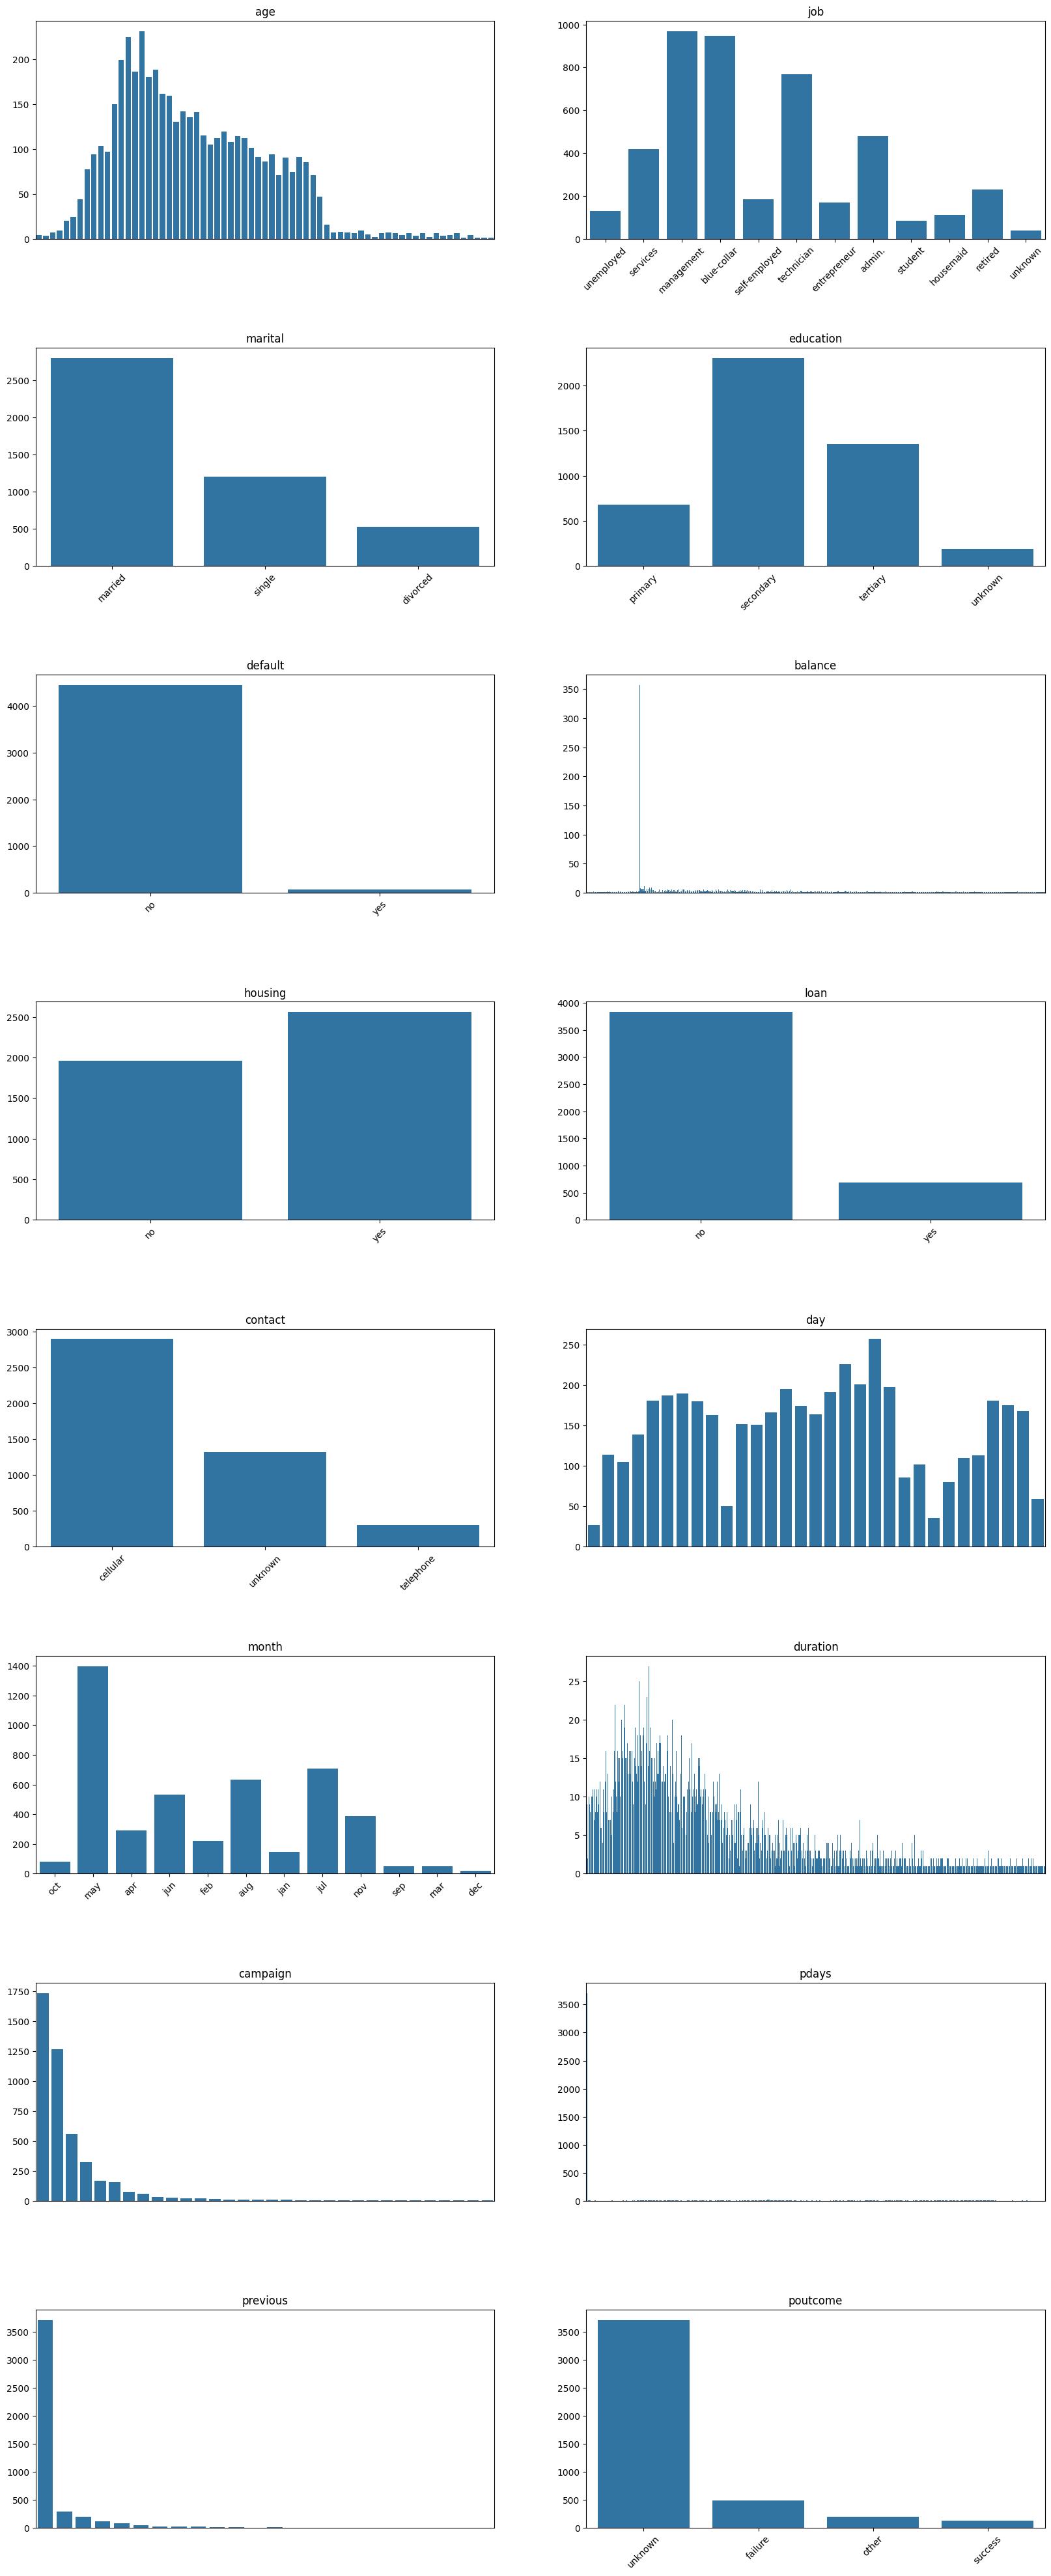

In [53]:
cols = df.columns

plt.figure(figsize=(20,50))
for i in range(len(cols) - 1):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    
    ax = sns.countplot(x=cols[i], data=df)
    ax.set_title(cols[i])
    if df.dtypes[cols[i]] == 'int64':
        ax.set_xticks([])
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=45)
                       
    ax.set_xlabel('')
    ax.set_ylabel('')

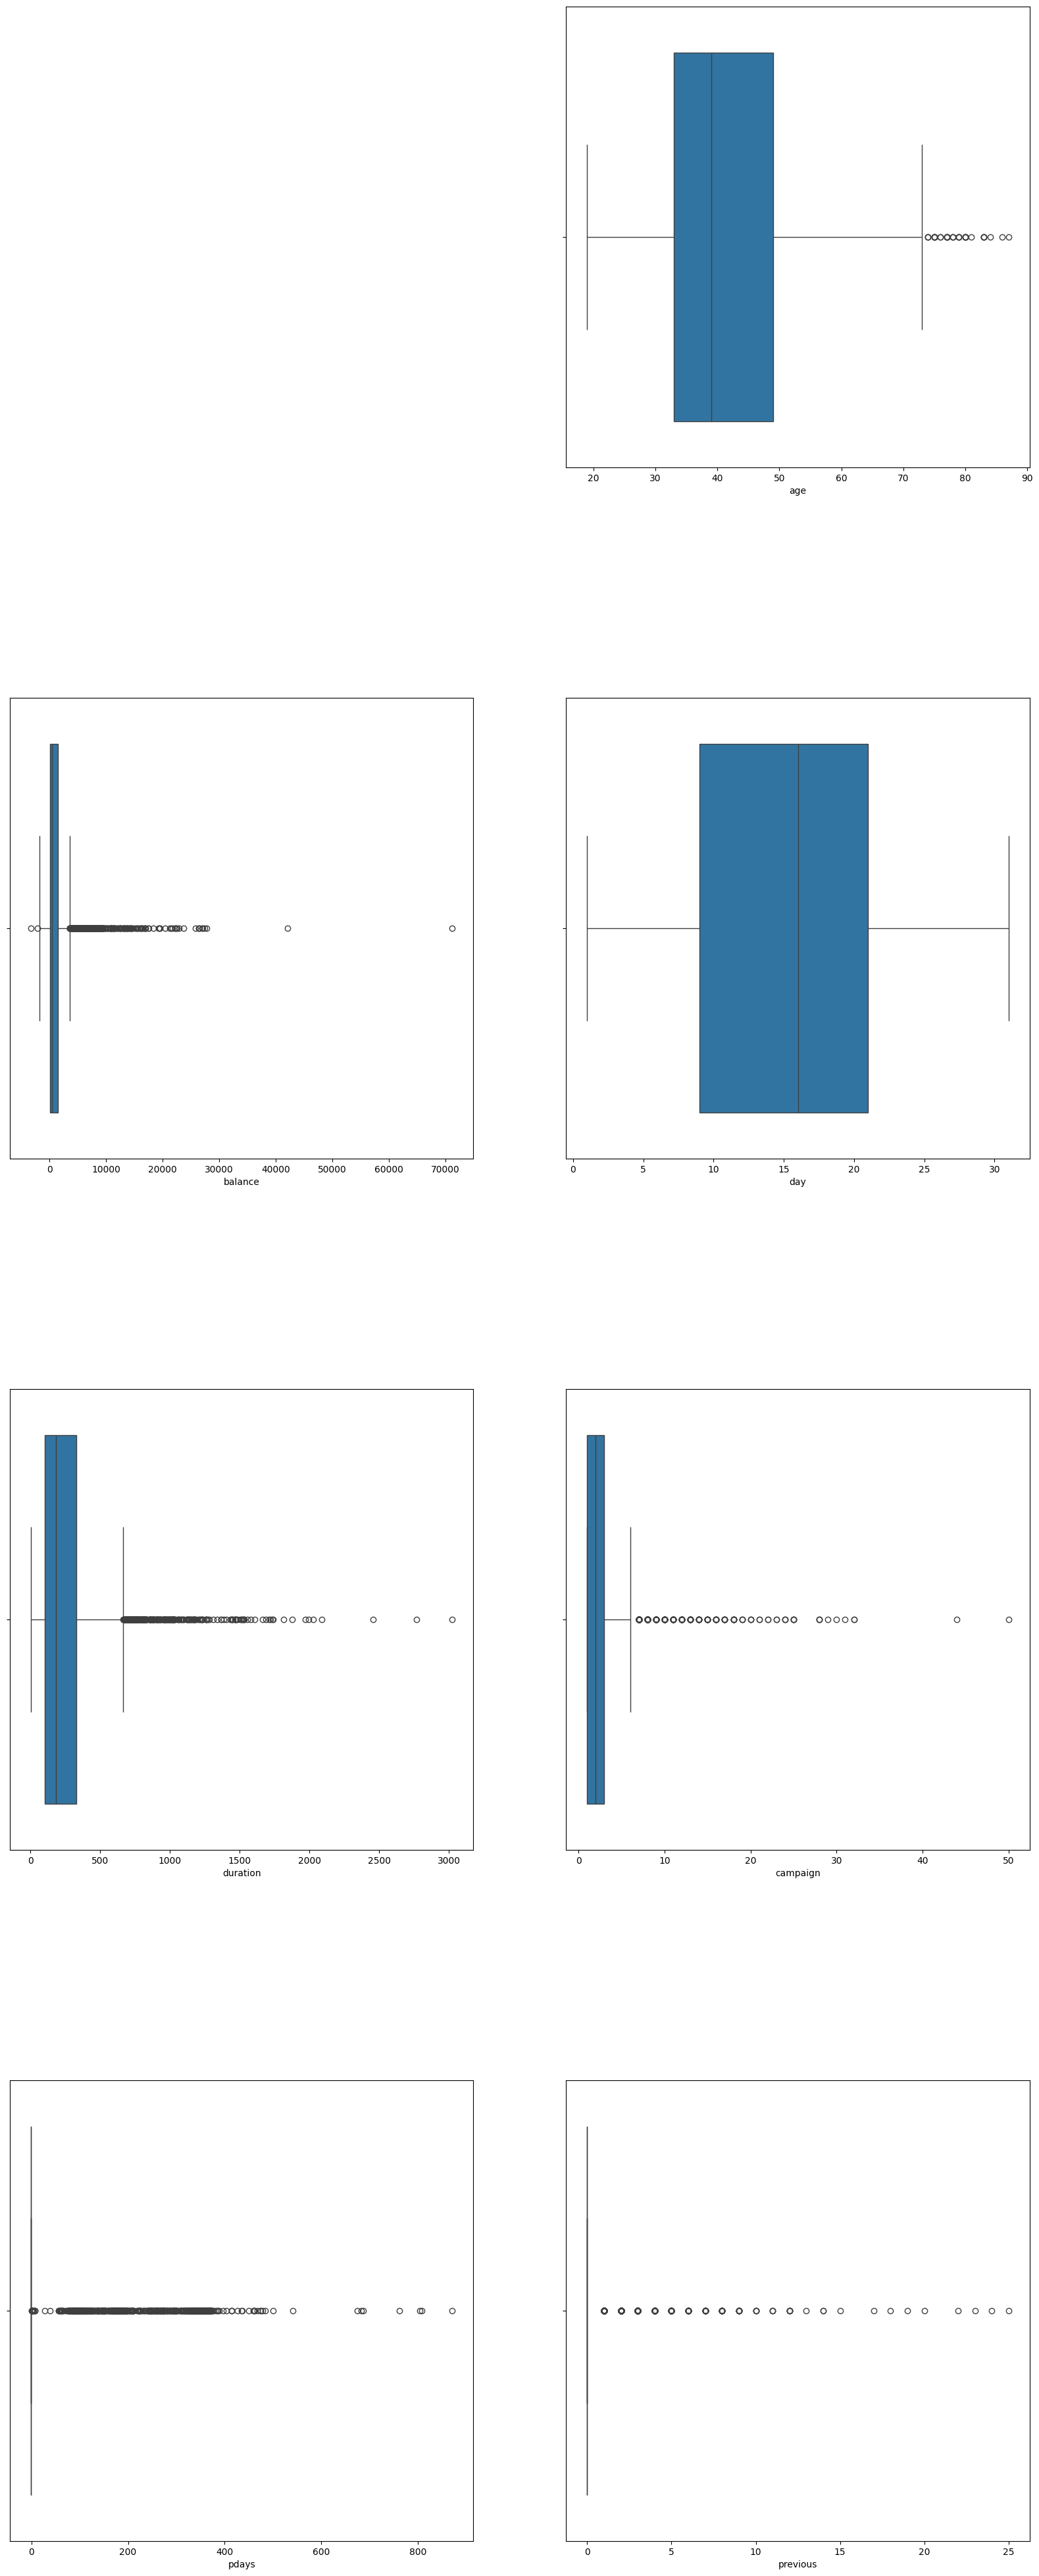

In [92]:
cols = df.columns
types = df.dtypes
plt.figure(figsize=(20,50))
j = 1

for i in range(len(cols) - 1):
    if types[cols[i]] == 'int64':
        j += 1
        plt.subplot(4, 2, j)
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        
        ax = sns.boxplot(x=cols[i], data=df)

In [131]:
df_encoded = df.copy()
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [132]:
cat_cols = [col for col in cols if df_encoded[col].dtype == np.dtype('object')]

for i in range(len(cat_cols)):
    if df_encoded[cat_cols[i]].unique().size > 3 or cat_cols[i] == 'y':
        le = LabelEncoder()
        df_encoded[cat_cols[i]] = le.fit_transform(df_encoded[cat_cols[i]])
    else:
        dummies = pd.get_dummies(df_encoded[cat_cols[i]], prefix=cat_cols[i], dtype=int)
        df_encoded = df_encoded.join(dummies)
        df_encoded.drop([cat_cols[i]], axis=1, inplace=True) 

df_encoded    

,age,job,education,balance,day,month,duration,campaign,pdays,previous,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,30,10,0,1787,19,10,79,1,-1,0,...,0,1,0,1,0,1,0,1,0,0
1,33,7,1,4789,11,8,220,1,339,4,...,0,1,0,0,1,0,1,1,0,0
2,35,4,2,1350,16,0,185,1,330,1,...,1,1,0,0,1,1,0,1,0,0
3,30,4,2,1476,3,6,199,4,-1,0,...,0,1,0,0,1,0,1,0,0,1
4,59,1,1,0,5,8,226,1,-1,0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,-333,30,5,329,5,-1,0,...,0,1,0,0,1,1,0,1,0,0
4517,57,6,2,-3313,9,8,153,1,-1,0,...,0,0,1,0,1,0,1,0,0,1
4518,57,9,1,295,19,1,151,11,-1,0,...,0,1,0,1,0,1,0,1,0,0
4519,28,1,1,1137,6,3,129,4,211,3,...,0,1,0,1,0,1,0,1,0,0


In [136]:
df_encoded['y'].head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: y, dtype: int32

<Axes: >

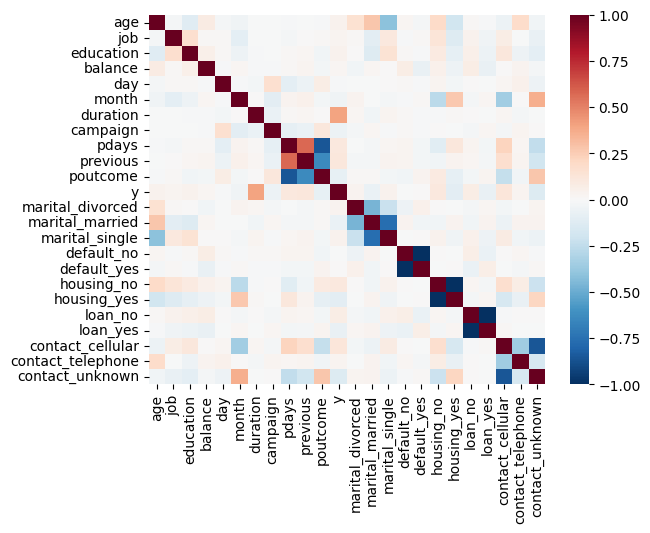

In [138]:
corr = df_encoded.corr()
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000))

In [227]:
X = df_encoded.drop(['y'], axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

y
0    3193
1    3193
Name: count, dtype: int64

In [228]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

In [229]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_smote)
y_tree_predict = tree.predict(X_test_scaled)

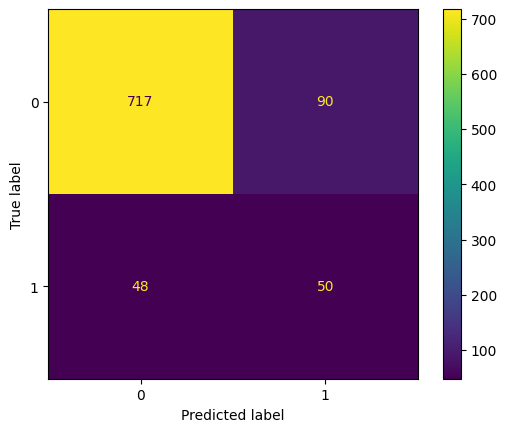

In [230]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_tree_predict)).plot()

In [231]:
print(classification_report(y_test, y_tree_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       807
           1       0.36      0.51      0.42        98

    accuracy                           0.85       905
   macro avg       0.65      0.70      0.67       905
weighted avg       0.87      0.85      0.86       905



In [232]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_scaled, y_smote)
y_forest_predict = forest.predict(X_test_scaled)

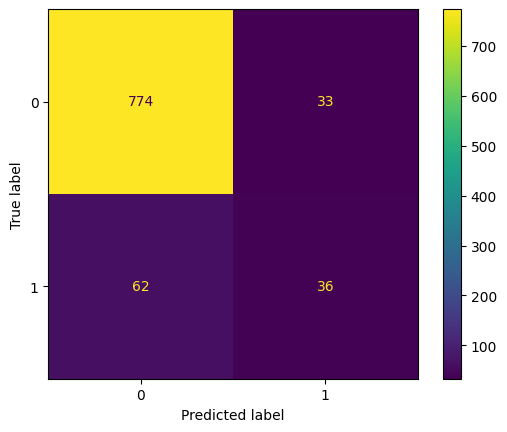

In [233]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_forest_predict)).plot()

In [234]:
print(classification_report(y_test, y_forest_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.52      0.37      0.43        98

    accuracy                           0.90       905
   macro avg       0.72      0.66      0.69       905
weighted avg       0.88      0.90      0.89       905



In [222]:
forest_rs = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rscv = RandomizedSearchCV(forest_rs, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 6, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=42)

In [223]:
rscv.fit(X_train_scaled, y_ros)
rscv.best_params_

Fitting 6 folds for each of 100 candidates, totalling 600 fits


{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': False}

In [251]:
forest_with_rscv = RandomForestClassifier(n_estimators=120, 
                                            min_samples_split=2, 
                                            min_samples_leaf=2,
                                            max_features='sqrt',
                                            max_depth=14,
                                            bootstrap=False,
                                            random_state=42)
forest_with_rscv.fit(X_train_scaled, y_ros)
y_forest_rscv_predict = forest_with_rscv.predict(X_test_scaled)

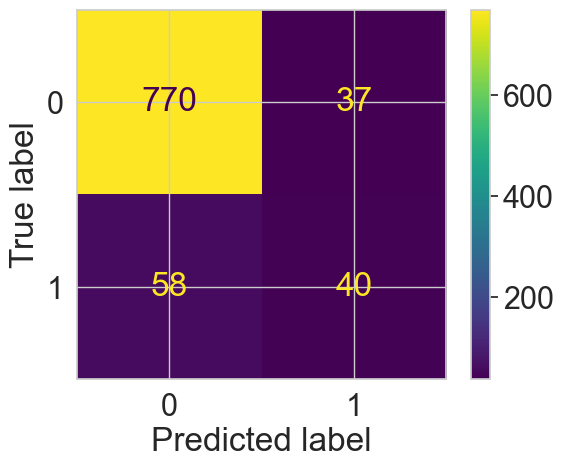

In [252]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_forest_rscv_predict)).plot()

In [253]:
print(classification_report(y_test, y_forest_rscv_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       807
           1       0.52      0.41      0.46        98

    accuracy                           0.90       905
   macro avg       0.72      0.68      0.70       905
weighted avg       0.89      0.90      0.89       905



In [240]:
rscv_df = pd.DataFrame(rscv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rscv_df = rscv_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'split3_test_score', 
            'split4_test_score', 
            'split5_test_score', 
            'std_test_score'],
            axis=1)
rscv_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,120,2,2,sqrt,14,False,0.966175,1
1,120,2,7,log2,14,False,0.942686,2
2,780,12,7,sqrt,15,True,0.930159,3
3,10,28,7,sqrt,15,False,0.924835,4
4,340,50,7,log2,14,False,0.916223,5
5,1000,7,18,log2,15,False,0.908236,6
6,340,23,18,log2,13,False,0.905574,7
7,780,44,18,sqrt,13,False,0.903852,8
8,890,7,7,sqrt,10,True,0.903382,9
9,340,12,2,log2,9,True,0.903069,10


In [246]:
rscv_df['param_bootstrap'] = le.fit_transform(rscv_df['param_bootstrap'])
rscv_df['param_max_features'] = le.fit_transform(rscv_df['param_max_features'])
rscv_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,120,2,2,1,14,0,0.966175,1
1,120,2,7,0,14,0,0.942686,2
2,780,12,7,1,15,1,0.930159,3
3,10,28,7,1,15,0,0.924835,4
4,340,50,7,0,14,0,0.916223,5
5,1000,7,18,0,15,0,0.908236,6
6,340,23,18,0,13,0,0.905574,7
7,780,44,18,1,13,0,0.903852,8
8,890,7,7,1,10,1,0.903382,9
9,340,12,2,0,9,1,0.903069,10


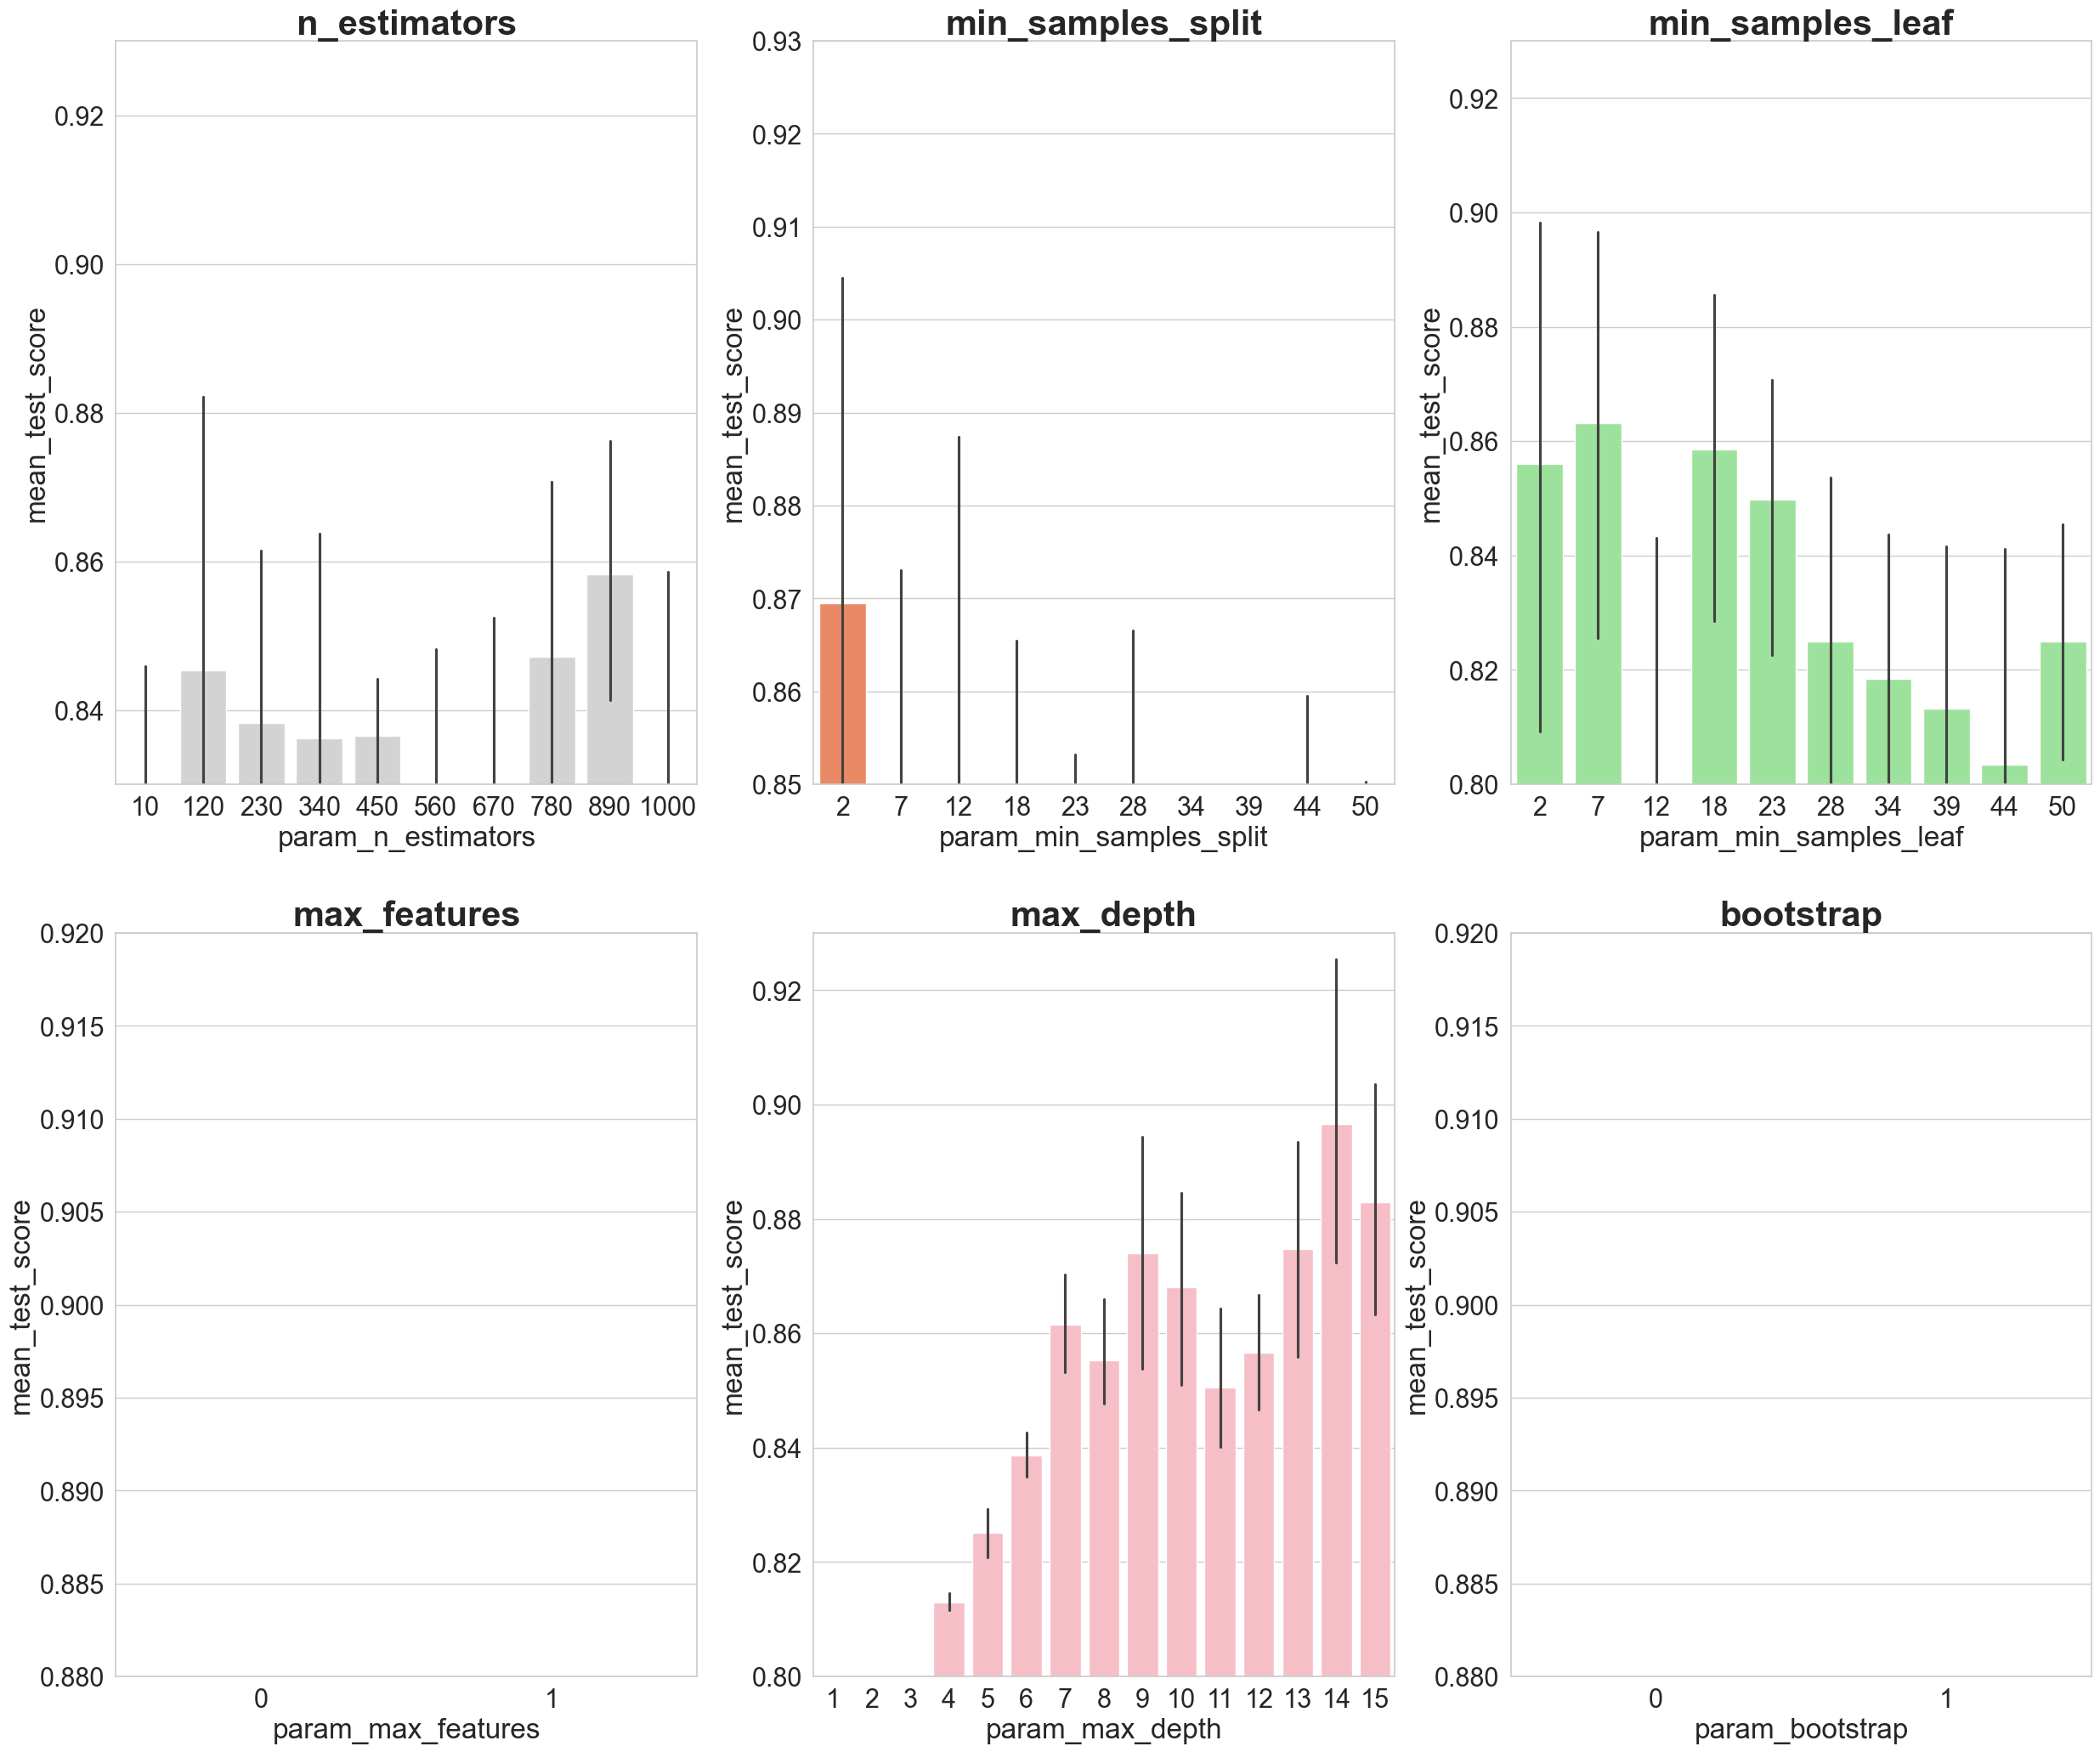

In [247]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rscv_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rscv_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rscv_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rscv_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rscv_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rscv_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [249]:
forest_gs = RandomForestClassifier(random_state=42)

n_estimators = [100, 120, 140, 850, 900]
max_features = ['sqrt', 'log2']
max_depth = [14,16,18,20]
min_samples_split = [2,3,4,5]
min_samples_leaf = [2,4,5,6,7,8]
bootstrap = [False, True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gscv = GridSearchCV(forest_gs, param_grid, cv = 3, verbose = 1, n_jobs=-1)

In [250]:
gscv.fit(X_train_scaled, y_ros)
gscv.best_params_

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 120}

In [255]:
forest_with_gscv = RandomForestClassifier(n_estimators=120, 
                                        min_samples_split=5, 
                                        min_samples_leaf=2,
                                        max_features='sqrt',
                                        max_depth=18,
                                        bootstrap=False,
                                        random_state=42)

forest_with_gscv.fit(X_train_scaled, y_ros)
y_forest_gscv_predict = forest_with_gscv.predict(X_test_scaled)

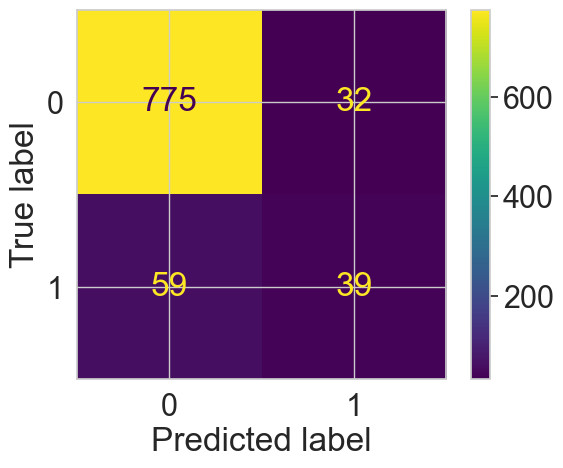

In [256]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_forest_gscv_predict)).plot()

In [257]:
print(classification_report(y_test, y_forest_gscv_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.55      0.40      0.46        98

    accuracy                           0.90       905
   macro avg       0.74      0.68      0.70       905
weighted avg       0.89      0.90      0.89       905



In [261]:
forest_4_cv = RandomForestClassifier(n_estimators=120, 
                                        min_samples_split=5, 
                                        min_samples_leaf=2,
                                        max_features='sqrt',
                                        max_depth=18,
                                        bootstrap=False,
                                        random_state=42)

cv_results = cross_validate(forest_4_cv, X_train_scaled, y_ros, scoring=('r2', 'roc_auc'), cv=5)
cv_results

{'fit_time': array([0.79039669, 1.0343256 , 0.88170075, 0.87322545, 0.9370997 ]),
 'score_time': array([0.04314375, 0.09961581, 0.06662011, 0.04515004, 0.05719066]),
 'test_r2': array([0.14241002, 0.87783861, 0.86217689, 0.83711815, 0.88097095]),
 'test_roc_auc': array([0.95229733, 0.99843015, 0.99689464, 0.99628387, 0.99792485])}